 # Customer Segmentation & Clustering project 

# <u> Explaratory Data Analysis 

## Import libraries for Analysis

In [4]:
import pandas as pd #Data manipulation library
import seaborn as sb #Visualisation library (statistical visualisation)
import matplotlib.pyplot as plt #General visualisation charts
from sklearn.cluster import KMeans #Clusturing library
import numpy as np
import sklearn
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #ignores warnings from graphs

## Import CSV file
### df stands for Dataframe, it is a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [6]:
df = pd.read_csv("E:/Data Analysis/Data Science Projects/Mall customer segmentation\Datasets/Mall_Customers.csv")

In [7]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Univariate Analysis

### Univariate analysis explores each variable in a data set, separately. So in this case we are looking for 1 variable

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


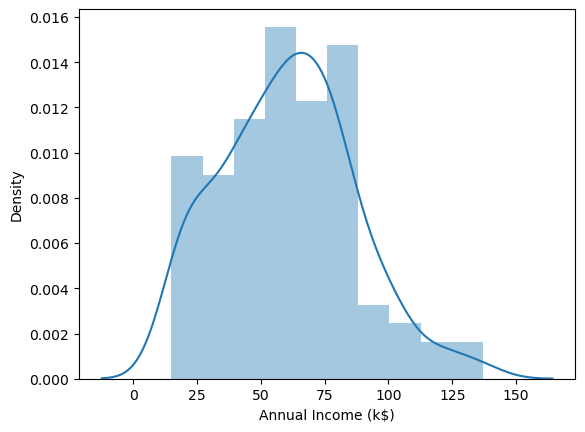

In [11]:
 sns.distplot(df['Annual Income (k$)']);

### Columns in the dataset

In [13]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

### These histograms below shows the distribution of dataset of columns.

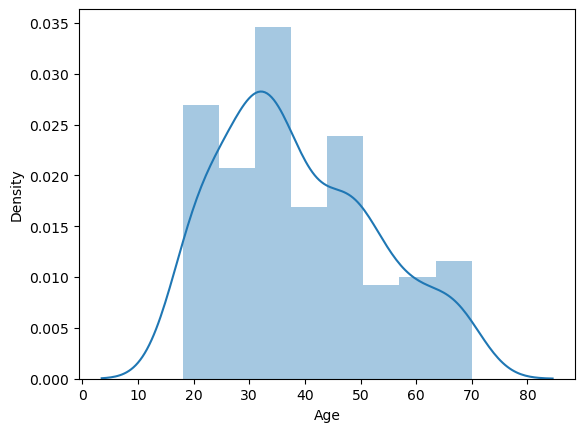

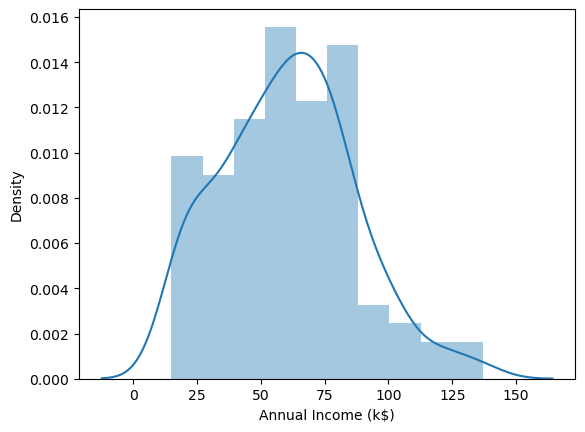

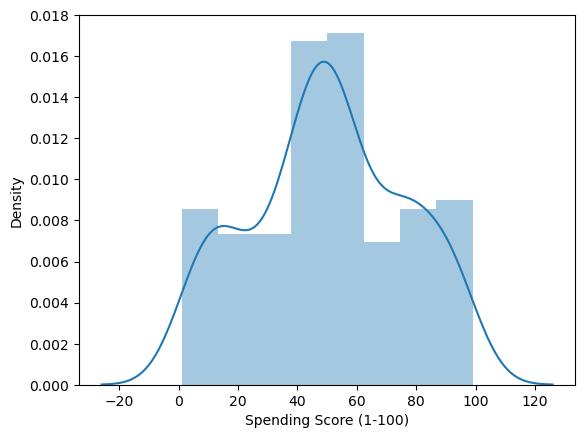

In [15]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.distplot(df[i])

### kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset

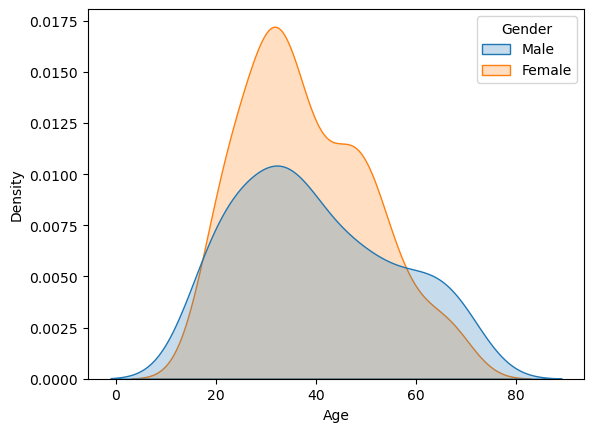

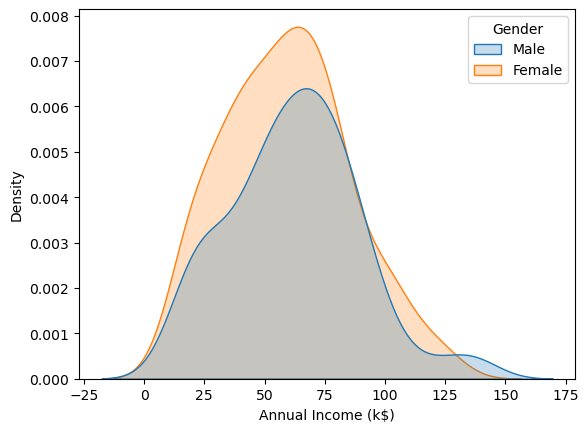

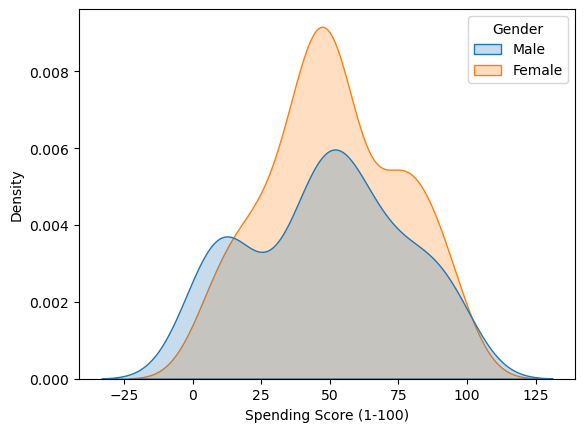

In [17]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.kdeplot(data=df, x=i, hue='Gender', fill=True)

### Here we have a boxplot chart, it is a visual that shows the 25th percentile, 50th percentile, 75th percentile, minimum, maximum and outlier values. In this case, the columns are plotted against "Gender". The middle line represents the median value.

In [19]:
print(df.head())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


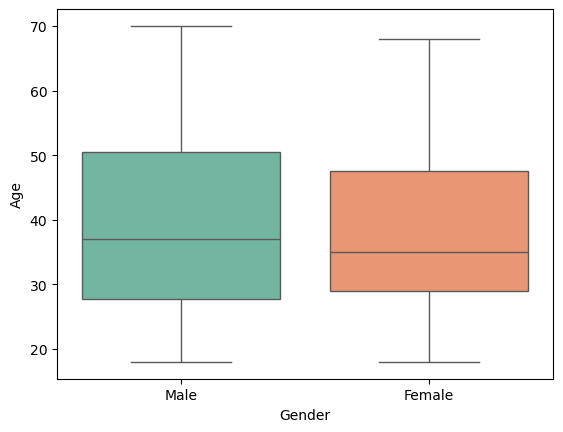

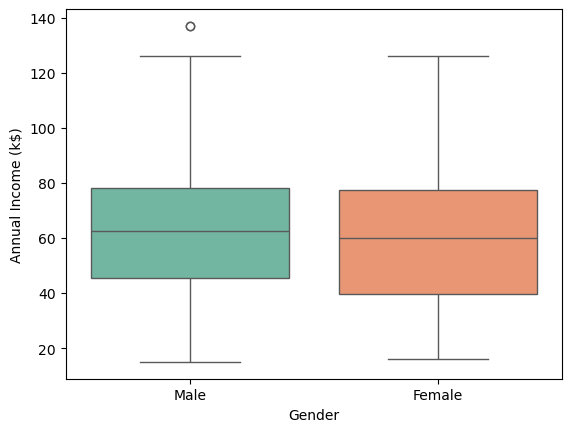

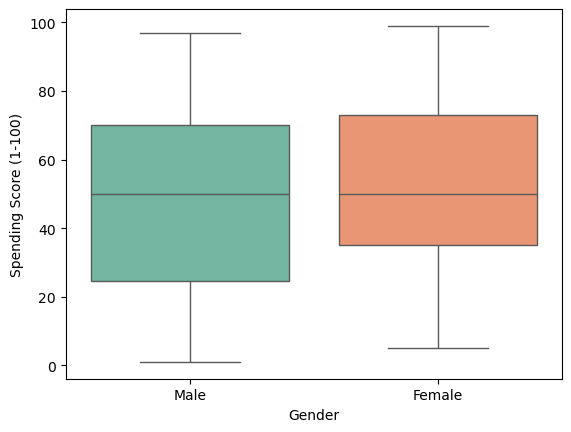

In [20]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in columns: 
    plt.figure()
    sns.boxplot(data=df, x='Gender',y=df[i], palette='Set2')

In [21]:
format = df['Gender'].value_counts(normalize=True) 

In [22]:
formatted_percentages = format.round(2) * 100

### It is noticeable in the boxplots that there appears to be a slightly higher number of females compared to males. The data shows that 56% of the individuals are female and 44% are male.

In [24]:
print(formatted_percentages)

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


# Bivariate Analysis
### This type of analysis is like looking at how two things are related to each other. It helps you see if there's a pattern or relationship between these two things

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

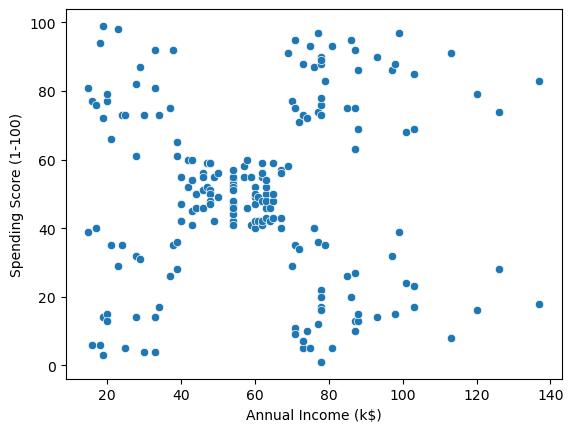

In [26]:
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')

### We can see there's 5 clustering between spending score and annual income

In [28]:
df.groupby(['Gender']),['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

(<pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000022F8F76B9B0>,
 ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

### Lets find the mean values for Genders 

In [30]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [31]:
df1 = df.drop(columns=['Gender'])

In [32]:
df1.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<Axes: >

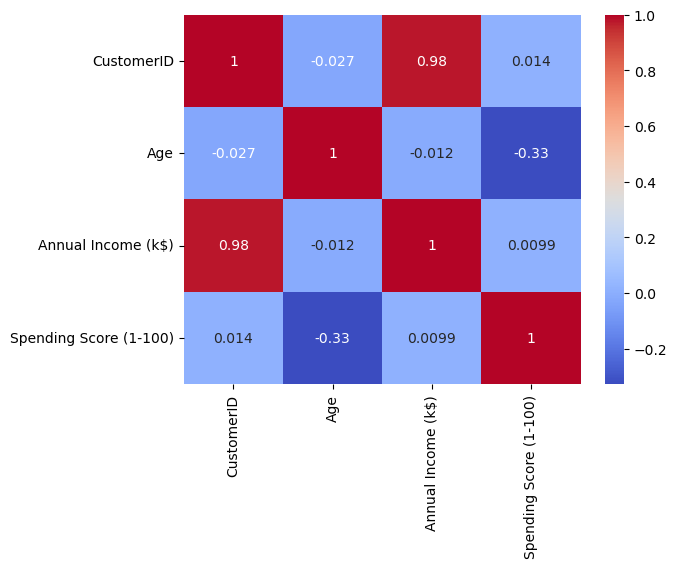

In [33]:
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

In [34]:
# _______________________________________________________End of EDA_____________________________________________________________________________________

# <u> Clustering - Univariate, Bivariate, Multivariate

In [178]:
clustering1 = KMeans(n_clusters=3)

In [180]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [182]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [184]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,2


### Now we can do some summary statistics around univariate cluster

In [187]:
df['Income Cluster'].value_counts()

Income Cluster
1    86
0    58
2    56
Name: count, dtype: int64

This is a count of how many data points fall into each income cluster. The clusters are labeled 0 through 5, and the numbers represent how many items are in each cluster:

Cluster 0: 54 items
Cluster 3: 50 items
Cluster 1: 42 items
Cluster 4: 32 items
Cluster 5: 16 items
Cluster 2: 6 items

In [190]:
clustering1.inertia_

25640.457784396836

## In clustering (like K-means), "inertia" is a measure of how well the clusters fit the data. Specifically:

### Inertia: It's the total distance between each data point and the center of its assigned cluster. A lower inertia means the clusters are tighter and better-defined.
In this case, the inertia is 5443. This number is used to assess the quality of the clustering:

### Lower inertia values are generally better because they indicate that data points are closer to their cluster centers.

In [193]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    inertia_scores.append(kmeans.inertia_)

In [194]:
inertia_scores

[137277.28000000003,
 49761.73701298701,
 23528.152173913048,
 14721.866979949875,
 8667.679614837509,
 5795.492712550607,
 4268.444017094018,
 2977.242424242424,
 2251.1410173160175,
 2087.5132161955694]

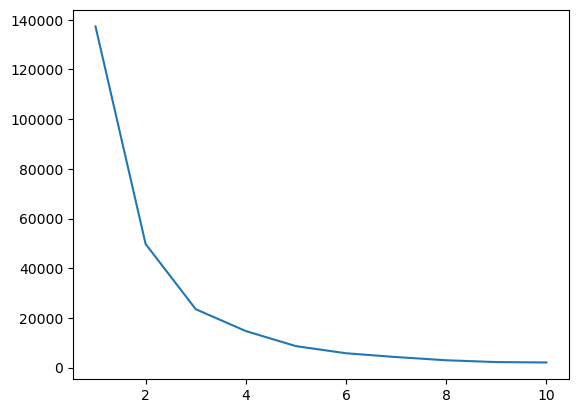

In [197]:
plt.plot(range(1,11),inertia_scores)

### This is called elbow method. I'm trying to find when the elbow starts, here we can see it starts at 3. So we can use 3 as the number of clusters

In [200]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)', 'Income Cluster',
       'Spending and Income Cluster'],
      dtype='object')

In [202]:
df.groupby('Income Cluster')[['Age','Annual Income (k$)',
       'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.120690,29.551724,49.689655
1,41.279070,60.906977,50.337209
2,36.910714,92.142857,50.517857


#### Each row describes a group of people (a cluster) who have similar average characteristics:

Income Cluster 0: Individuals in this cluster are around 37 years old, have an average annual income of $29,551.72, and a spending score of 49.69.

Income Cluster 1: This group averages 41 years old, earns $60,906.98 annually, and has a spending score of 50.34.

Income Cluster 2: Members are approximately 37 years old, with an annual income of $92,142.86 and a spending score of 50.52.

#### Despite significant differences in income levels, spending scores remain relatively consistent across income clusters, suggesting that higher income does not necessarily lead to higher spending behavior.


# Bivariate clustering

In [159]:
clustering2 =KMeans()
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,4


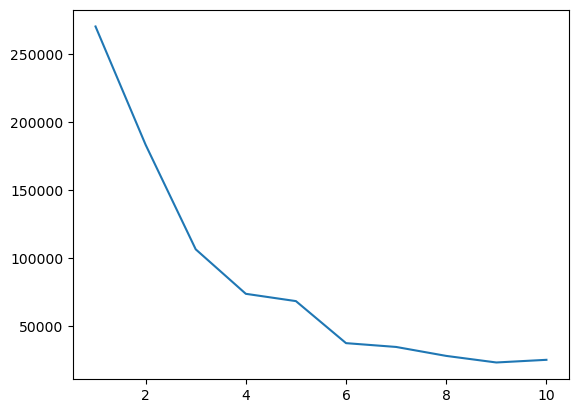

In [161]:
inertia_scores2=[]
for i in range(1, 11):
    kmeans2 = KMeans(n_clusters=i) 
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    inertia_scores2.append(kmeans2.inertia_)

plt.plot(range(1,11),inertia_scores2)

### It looks like we will have a cluster of 5

In [163]:
clustering2 =KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,Male,19,15,39,0,2
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,0,2
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,0,2


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

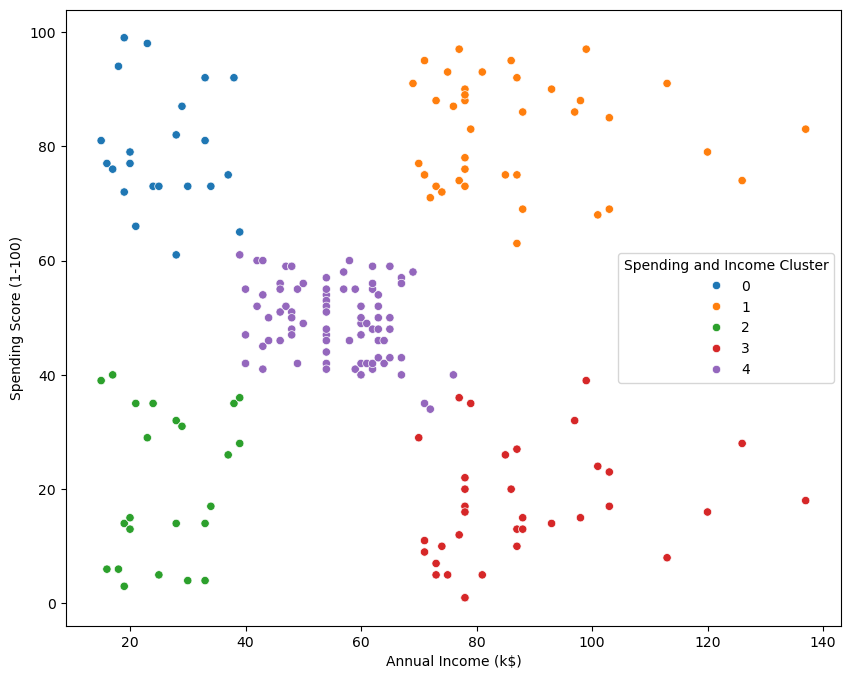

In [164]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df,x ='Annual Income (k$)', y= 'Spending Score (1-100)',hue= 'Spending and Income Cluster', palette ='tab10' )

In [165]:
clustering2.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852]])

In [166]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns= ['x','y']

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

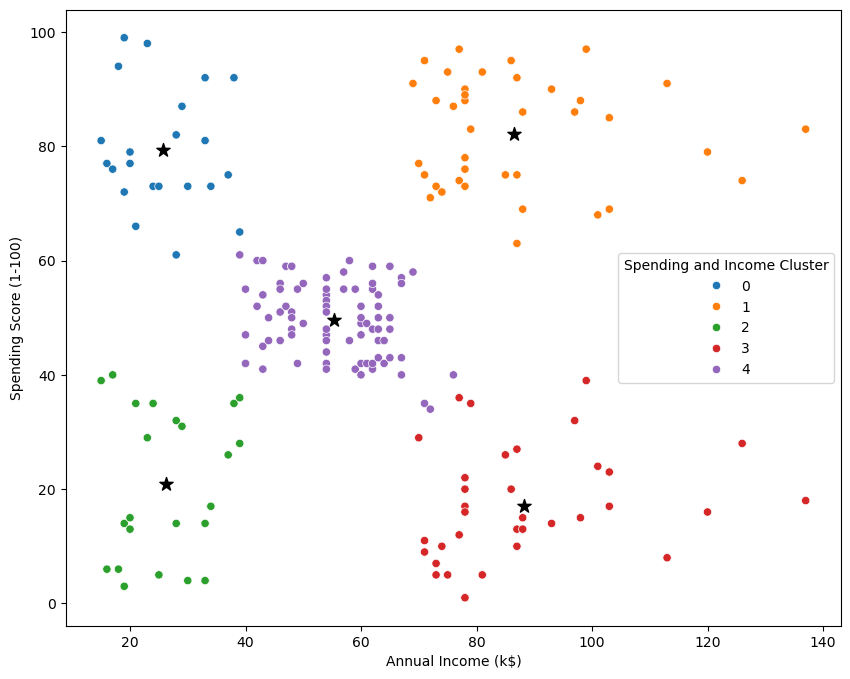

In [168]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x ='Annual Income (k$)', y= 'Spending Score (1-100)',hue= 'Spending and Income Cluster', palette ='tab10' )

In [206]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.590909,0.409091
1,0.538462,0.461538
2,0.608696,0.391304
3,0.457143,0.542857
4,0.592593,0.407407


# Analysis

## Target Cluster

* #### Target group would be cluster 1 which has a high spending score and high income.
* #### 54% of cluster 3 shoppers are women. We should look for ways to attract these customers using a marketing campaign targeting popular items in this cluster. In addition, women in relationships are likely to buy their partner a gift.
* #### Cluster 0 presents an interesting opportunity to marker to the customers for sales event on popular items.

